In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, confusion_matrix
from sklearn.metrics import roc_curve, precision_recall_curve, auc, f1_score
import numpy as np


In [4]:
df = pd.read_csv("./dataset/heart.csv")
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [5]:
df.tail(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
908,63,M,ASY,140,187,0,LVH,144,Y,4.0,Up,1
909,63,F,ASY,124,197,0,Normal,136,Y,0.0,Flat,1
910,41,M,ATA,120,157,0,Normal,182,N,0.0,Up,0
911,59,M,ASY,164,176,1,LVH,90,N,1.0,Flat,1
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [9]:
# Assuming 'Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope' are string columns
string_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Use LabelEncoder for string columns
label_encoder = LabelEncoder()
for column in string_columns:
    df[column] = label_encoder.fit_transform(df[column])


In [10]:
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

In [11]:
X.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2
5,39,1,2,120,339,0,1,170,0,0.0,2
6,45,0,1,130,237,0,1,170,0,0.0,2
7,54,1,1,110,208,0,1,142,0,0.0,2
8,37,1,0,140,207,0,1,130,1,1.5,1
9,48,0,1,120,284,0,1,120,0,0.0,2


In [12]:
y.head(5)

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [13]:
df.to_csv('labelEncoded_heart.csv', index=False)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30)

## Training of Linear Regression Model (Model 1)

In [16]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [94]:
y_pred1 = model1.predict(X_test)
mse = mean_squared_error(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)
mae = mean_absolute_error(y_test, y_pred1)

print(f"Mean Squared Error: {round(mse,4)}")
print(f"R-squared: {round(r2,4)}")
print(f"Mean Absolute Error: {round(mae,4)}")

Mean Squared Error: 0.1248
R-squared: 0.4961
Mean Absolute Error: 0.2715


## Training of Random Forest Classifier Model (Model 2)

In [18]:
model2 = RandomForestClassifier()
model2.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
y_pred2 = model2.predict(X_test)
mse = mean_squared_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)
mae = mean_absolute_error(y_test, y_pred2)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 0.13768115942028986
R-squared: 0.44434437086092704
Mean Absolute Error: 0.13768115942028986


## Training of Decision Tree Model (Model 3)

In [34]:
model3 = DecisionTreeClassifier()
model3.fit(X_train, y_train)

DecisionTreeClassifier()

In [40]:
y_pred3 = model3.predict(X_test)
mse = mean_squared_error(y_test, y_pred3)
r2 = r2_score(y_test, y_pred3)
mae = mean_absolute_error(y_test, y_pred3)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 0.20652173913043478
R-squared: 0.16651655629139062
Mean Absolute Error: 0.20652173913043478


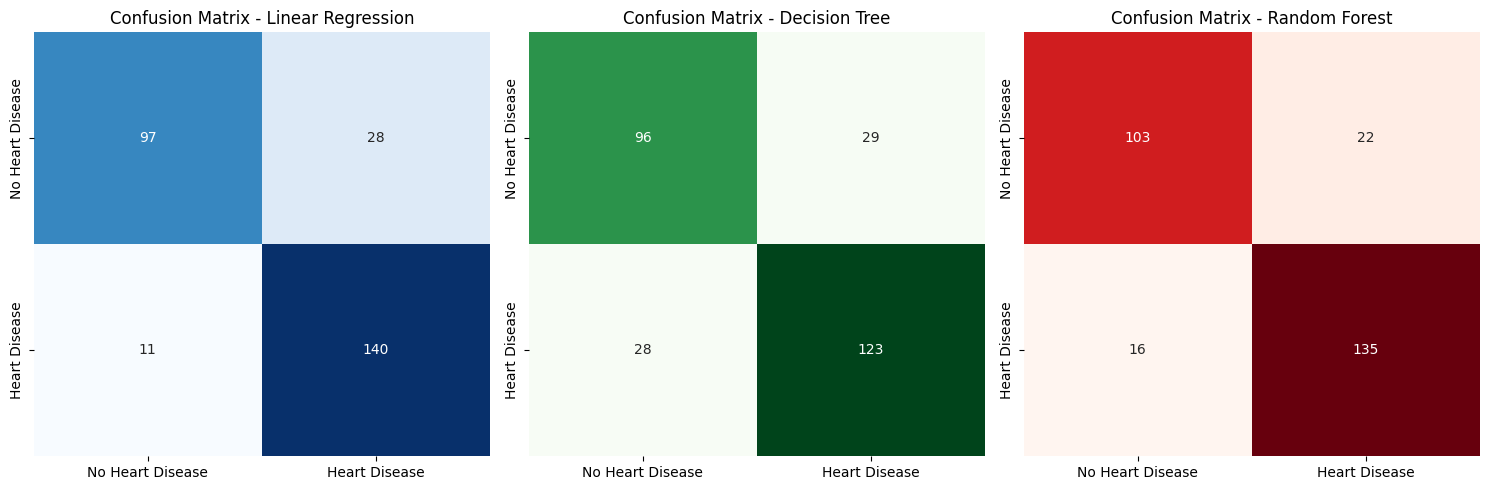

In [93]:
cm_lr = confusion_matrix(y_test, (y_pred1 > 0.42).astype(int))
cm_rf = confusion_matrix(y_test, (y_pred2 > 0).astype(int)) 
cm_dt = confusion_matrix(y_test, (y_pred3 > 0).astype(int))

# Plot confusion matrices
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No Heart Disease", "Heart Disease"],
            yticklabels=["No Heart Disease", "Heart Disease"])
plt.title('Confusion Matrix - Linear Regression')

plt.subplot(1, 3, 2)
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Greens", cbar=False,
            xticklabels=["No Heart Disease", "Heart Disease"],
            yticklabels=["No Heart Disease", "Heart Disease"])
plt.title('Confusion Matrix - Decision Tree')

plt.subplot(1, 3, 3)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Reds", cbar=False,
            xticklabels=["No Heart Disease", "Heart Disease"],
            yticklabels=["No Heart Disease", "Heart Disease"])
plt.title('Confusion Matrix - Random Forest')


plt.tight_layout()
plt.show()


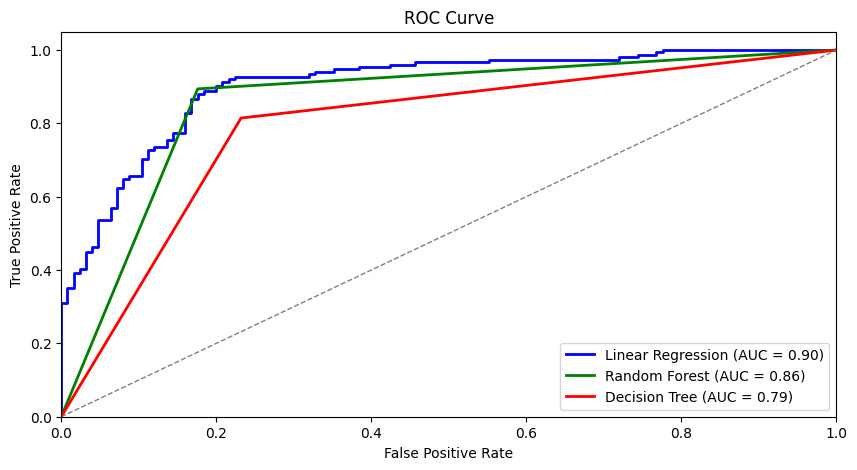

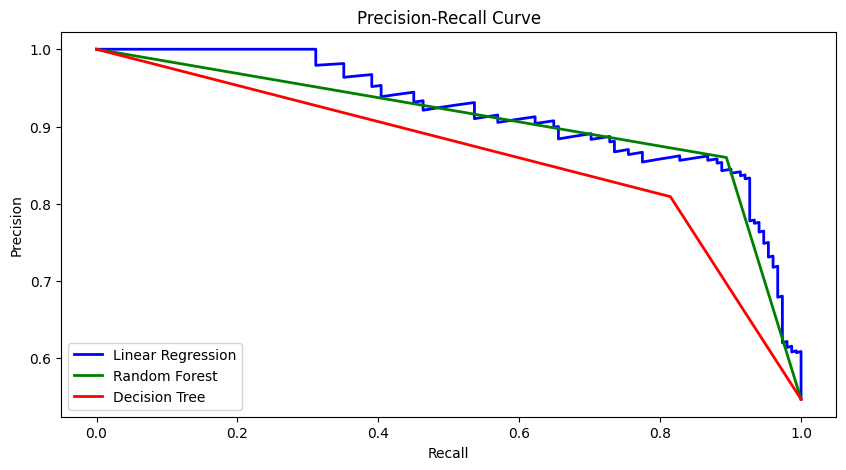

Best threshold for Linear Regression (based on F1-score): 0.42
Best threshold for Random Forest (based on F1-score): 1
Best threshold for Decision Tree (based on F1-score): 1


In [95]:
# Assuming y_test and y_pred1, y_pred2, y_pred3 are defined
# y_pred1, y_pred2, and y_pred3 are the predicted probabilities from your models

# Calculate ROC curve for Linear Regression model
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred1)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Calculate ROC curve for Random Forest model
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred2)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Calculate ROC curve for Decision Tree model
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred3)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot ROC curve
plt.figure(figsize=(10, 5))

plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label='Linear Regression (AUC = %0.2f)' % roc_auc_lr)
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_dt, tpr_dt, color='red', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate Precision-Recall curve for Linear Regression model
precision_lr, recall_lr, thresholds_pr_lr = precision_recall_curve(y_test, y_pred1)
f1_scores_lr = 2 * (precision_lr * recall_lr) / (precision_lr + recall_lr)
best_threshold_pr_lr = thresholds_pr_lr[np.argmax(f1_scores_lr)]

# Calculate Precision-Recall curve for Random Forest model
precision_rf, recall_rf, thresholds_pr_rf = precision_recall_curve(y_test, y_pred2)
f1_scores_rf = 2 * (precision_rf * recall_rf) / (precision_rf + recall_rf)
best_threshold_pr_rf = thresholds_pr_rf[np.argmax(f1_scores_rf)]

# Calculate Precision-Recall curve for Decision Tree model
precision_dt, recall_dt, thresholds_pr_dt = precision_recall_curve(y_test, y_pred3)
f1_scores_dt = 2 * (precision_dt * recall_dt) / (precision_dt + recall_dt)
best_threshold_pr_dt = thresholds_pr_dt[np.argmax(f1_scores_dt)]

# Plot Precision-Recall curve
plt.figure(figsize=(10, 5))

plt.plot(recall_lr, precision_lr, color='blue', lw=2, label='Linear Regression')
plt.plot(recall_rf, precision_rf, color='green', lw=2, label='Random Forest')
plt.plot(recall_dt, precision_dt, color='red', lw=2, label='Decision Tree')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

print("Best threshold for Linear Regression (based on F1-score):", round(best_threshold_pr_lr,2))
print("Best threshold for Random Forest (based on F1-score):", best_threshold_pr_rf)
print("Best threshold for Decision Tree (based on F1-score):", best_threshold_pr_dt)


In [96]:
def calculateAccuracy(cm):
    """
    Calculate accuracy from confusion matrix.

    Args:
    cm : list of lists
        Confusion matrix containing TP, FP, TN, FN values.

    Returns:
    accuracy : float
        Accuracy of the model.
    """
    TP = cm[1][1]  # True Positive
    FP = cm[0][1]  # False Positive
    TN = cm[0][0]  # True Negative
    FN = cm[1][0]  # False Negative

    accuracy = (TP + TN) / (TP + FP + TN + FN)
    return accuracy

# Calculate accuracy for Linear Regression model
accuracy_lr = calculateAccuracy(cm_lr)
print("Accuracy of Linear Regression model:", round(accuracy_lr*100, 2), "%")

# Calculate accuracy for Random Forest model
accuracy_rf = calculateAccuracy(cm_rf)
print("Accuracy of Random Forest model:", round(accuracy_rf*100, 2), "%")

# Calculate accuracy for Decision Tree model
accuracy_dt = calculateAccuracy(cm_dt)
print("Accuracy of Decision Tree model:", round(accuracy_dt*100, 2), "%")

Accuracy of Linear Regression model: 85.87 %
Accuracy of Random Forest model: 86.23 %
Accuracy of Decision Tree model: 79.35 %


In [51]:
from joblib import dump
dump(model1, './models/linear_regression_model.sav')
dump(model2, './models/random_forest_classifier_model.sav')
dump(model3, './models/decision_tree_model.sav')

['./models/decision_tree_model.sav']

# At this point, run the app.py file first and then run the command below in terminal

# uvicorn app:app --reload

### Run above command in terminal before proceeding to next snippet

In [24]:
import requests

# Adjust the input data based on your features
input_data = {

    'Age': 49,
    'Sex': 0,
    'ChestPainType': 2,
    'RestingBP': 160,
    'Cholesterol': 180,
    'FastingBS': 0,
    'RestingECG': 1,
    'MaxHR': 156,
    'ExerciseAngina': 0,
    'Oldpeak': 1,
    'ST_Slope': 1
}


In [25]:
# Make a POST request to the /predict_LR endpoint
response = requests.post('http://127.0.0.1:8000/predictLR', json=input_data)

if response.status_code == 200:
    result = response.json()

    # Extract the prediction value from the list or default to 0 if 'prediction' key is not present or empty
    prediction_values = result.get('prediction', [0])
    
    # Use the first element of the list as the prediction value
    prediction_value = float(prediction_values[0])
    
    prediction_condition = "Person has heart disease!" if prediction_value > 0.6 else "Person does not have heart disease!"

    print(f"Prediction: {prediction_value}, Condition: {prediction_condition}")
else:
    print(f"Error: {response.json()}")


ConnectionError: HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /predictLR (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000017ADFC0F770>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))

In [ ]:
# Make a POST request to the /predict_RF endpoint
response_rf = requests.post('http://127.0.0.1:8000/predictRF', json=input_data)

if response_rf.status_code == 200:
    result_rf = response_rf.json()

    # Extract the prediction value from the list or default to 0 if 'prediction' key is not present or empty
    prediction_values_rf = result_rf.get('prediction', [0])

    # Use the first element of the list as the prediction value
    prediction_value_rf = float(prediction_values_rf[0])

    prediction_condition_rf = "Person has heart disease!" if prediction_value_rf > 0 else "Person does not have heart disease!"

    print(f"Random Forest Prediction: {prediction_value_rf}, Condition: {prediction_condition_rf}")
else:
    print(f"Random Forest Error: {response_rf.json()}")


Random Forest Prediction: 0.0, Condition: Person does not have heart disease!
